In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data
from jupyterthemes import jtplot
jtplot.style()
'''
def get_db_url(user, host, password, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return url
'''

"\ndef get_db_url(user, host, password, db):\n    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'\n    return url\n"

In [2]:
#1 In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) 
#containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# print the first 3 rows
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# print the number of rows and columns (shape)
df.shape

(150, 5)

In [5]:
# print the column names
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
# print the data type of each column
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
# print the summary statistics for each of the numeric variables. 
df.describe().T
# Would you recommend rescaling the data based on these statistics?
# No

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [8]:
#2 Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [9]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)
df_excel_sample.shape

(100, 12)

In [10]:
# print the number of rows of your original dataframe
df_excel.shape

(7049, 12)

In [11]:
# print the first 5 column names
df_excel_sample.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [12]:
# print the column names that have a data type of object
object_df = df_excel_sample.dtypes == 'object'
object_df


customer_id           True
gender                True
is_senior_citizen    False
partner               True
dependents            True
phone_service        False
internet_service     False
contract_type        False
payment_type          True
monthly_charges      False
total_charges        False
churn                 True
dtype: bool

In [13]:
object_df.index[object_df == True]

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [14]:
# compute the range for each of the numeric variables.
df_excel.monthly_charges.max() - df_excel.monthly_charges.min(), df_excel.total_charges.max() - df_excel.total_charges.min(),

(100.5, 8666.0)

In [15]:
#3. Read the data from this google sheet into a dataframe, df_google
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

In [16]:
# print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
# print the number of rows and columns
df_google.shape

(891, 12)

In [18]:
# print the column names
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
# print the data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
# print the summary statistics for each of the numeric variables
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# print the unique values for each of your categorical variables
df_google.Sex.unique(), df_google.Survived.unique(), df_google.Embarked.unique(), df_google.Pclass.unique()

(array(['male', 'female'], dtype=object),
 array([0, 1]),
 array(['S', 'C', 'Q', nan], dtype=object),
 array([3, 1, 2]))

In [22]:
# from env import host, user, password
from acquire import get_titanic_data, get_iris_data

In [23]:
df = get_titanic_data()
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [24]:
df = get_iris_data()
df.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa


In [25]:
# Using the Iris Data:

#1. Use the function defined in acquire.py to load the iris data.
df = get_iris_data()
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [26]:
#2. Drop the species_id and measurement_id columns.
df.drop(columns=['species_id','measurement_id'], inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
#3. Rename the species_name column to just species.
df.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_name']

In [28]:
df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [29]:
#4. Create dummy variables of the species name.
dummies = pd.get_dummies(df[['species']], drop_first=False)
dummies.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [30]:
df = pd.concat([df, dummies], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [31]:
#5. Create a function named prep_iris that accepts the untransformed iris data, 
# and returns the data with the transformations above applied.
def prep_iris(df):
    '''
    Takes a iris dataframe drops species_id and measurement_id,renames species_name to just species and creates dummy variables for species
    return: single cleaned dataframe
    '''
    df.drop_duplicates(inplace=True)
    dropcols = ['species_id','measurement_id']
    df.drop(columns=dropcols, inplace=True)
    df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    dummies = pd.get_dummies(df[['species']], drop_first=False)
    return pd.concat([df, dummies], axis=1)

In [32]:
#1 Attendance Data

'''
Load the attendance.csv file and calculate an attendance percentage for each student.
One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:


name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: grade, dtype: float64
'''
attendance_df = pd.read_csv('untidy-data/attendance.csv')
attendance_df.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [33]:
attendance_df.rename(columns={'Unnamed: 0':'name'},inplace=True)
attendance_df.head(1)

,name,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T


In [34]:
attendance_melt = pd.melt(attendance_df, id_vars = 'name', var_name = 'Date',value_name = 'attendance')
attendance_melt.head()

,name,Date,attendance
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [35]:
def attendance_percentage(string):
    if string == 'P':
        return 0.125
    elif string == 'H':
        return 0.0625
    elif string == 'T':
        return 0.1125
    else:
        return 0

In [36]:
attendance_melt['attendance_pct'] = attendance_melt.attendance.apply(attendance_percentage)
attendance_melt.head()

,name,Date,attendance,attendance_pct
0,Sally,2018-01-01,P,0.1250
1,Jane,2018-01-01,A,0.0000
2,Billy,2018-01-01,A,0.0000
3,John,2018-01-01,P,0.1250
4,Sally,2018-01-02,T,0.1125


In [37]:
attendance_melt.groupby('name').attendance_pct.sum()

name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: attendance_pct, dtype: float64

In [38]:
#2. Coffee Levels
#a. Read the coffee_levels.csv file.
coffee_levels = pd.read_csv('untidy-data/coffee_levels.csv')
coffee_levels.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [39]:
#b. Transform the data so that each carafe is in it's own column.
coffee_pivot = coffee_levels.pivot_table(index = 'hour',columns= 'coffee_carafe',values='coffee_amount')
coffee_pivot

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


In [40]:
#c. Is this the best shape for the data?
coffee_pivot.T  #yeah beause transposed looks too wide like Kylo Ren

hour,8,9,10,11,12,13,14,15,16,17
coffee_carafe,,,,,,,,,,
x,0.816164,0.451018,0.843279,0.335533,0.898291,0.310711,0.507288,0.215043,0.183891,0.391560
y,0.189297,0.521502,0.023163,0.235529,0.017009,0.997464,0.058361,0.144644,0.544676,0.594126
z,0.999264,0.915990,0.144928,0.311495,0.771947,0.398520,0.864464,0.436364,0.280621,0.436677


In [41]:
#3. Cake Recipes

#a. Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, 
# oven rack positions, and oven temperatures.
cake_recipes = pd.read_csv('untidy-data/cake_recipes.csv')
cake_recipes

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [42]:
#b. Tidy the data as necessary.
cake_recipes[['recipe','position']] = cake_recipes['recipe:position'].str.split(':', expand = True)
cake_recipes.drop(columns='recipe:position', inplace = True)
cake_recipes

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom
5,71.306308,82.795477,92.098049,53.960273,c,top
6,52.799753,58.670419,51.747686,56.183110,d,bottom
7,96.873178,76.101363,59.571620,50.971626,d,top


In [43]:
#a little easier to read....
damn_cakes = cake_recipes.pivot_table(index='position', columns='recipe', values=['225','250','275','300']).T
damn_cakes.reset_index(inplace=True)


In [44]:
damn_cakes.rename(columns={'level_0':'temp'},inplace=True)
damn_cakes

position,temp,recipe,bottom,top
0,225,a,61.738655,51.709751
1,225,b,57.095320,82.455004
2,225,c,96.470207,71.306308
3,225,d,52.799753,96.873178
4,250,a,53.912627,52.009735
5,250,b,61.904369,95.224151
6,250,c,52.001358,82.795477
7,250,d,58.670419,76.101363
8,275,a,74.414730,68.576858
9,275,b,61.196980,98.594881


In [45]:
#c. Which recipe, on average, is the best? recipe b
cake_mean = damn_cakes.groupby('recipe')['bottom','top'].mean()
cake_mean

position,bottom,top
recipe,,
a,72.213199,55.631204
b,69.861302,83.610846
c,76.709469,75.040027
d,54.850242,70.879447


In [46]:
cake_mean.mean(axis=1)

recipe
a    63.922201
b    76.736074
c    75.874748
d    62.864844
dtype: float64

In [47]:
#d. Which oven temperature, on average, produces the best results? 275
temp_mean = damn_cakes.groupby('temp')[['bottom','top']].mean()
temp_mean

position,bottom,top
temp,,
225,67.025984,75.586060
250,56.622193,76.532681
275,70.063156,79.710352
300,79.922880,53.332429


In [48]:
temp_mean.mean(axis=1)

temp
225    71.306022
250    66.577437
275    74.886754
300    66.627655
dtype: float64

In [49]:
#e. Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees
max_bottom , max_top = damn_cakes.bottom.max(),damn_cakes.top.max()
max_bottom , max_top

(99.2485405378462, 98.59488079742296)

In [50]:
damn_cakes[damn_cakes.bottom == max_bottom]

position,temp,recipe,bottom,top
13,300,b,99.248541,58.169349


In [51]:
# Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.
#1. Split your data into train, validate, and test samples.
import prepare_pro
iris = get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [52]:
train, validate, test = prepare_pro.prep_iris(iris)

In [53]:
train.shape[0], validate.shape[0], test.shape[0]

(84, 36, 30)

In [54]:
train.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
138,6.0,3.0,4.8,1.8,virginica,0,0,1


In [55]:
#2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, 
# the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.
melt = train[['sepal_length','sepal_width','petal_length','petal_width','species']].melt(id_vars="species", var_name="measurement")
melt

,species,measurement,value
0,virginica,sepal_length,6.0
1,setosa,sepal_length,5.0
2,versicolor,sepal_length,5.7
3,versicolor,sepal_length,6.4
4,versicolor,sepal_length,6.2
...,...,...,...
331,virginica,petal_width,2.3
332,versicolor,petal_width,1.3
333,versicolor,petal_width,1.4
334,virginica,petal_width,1.8


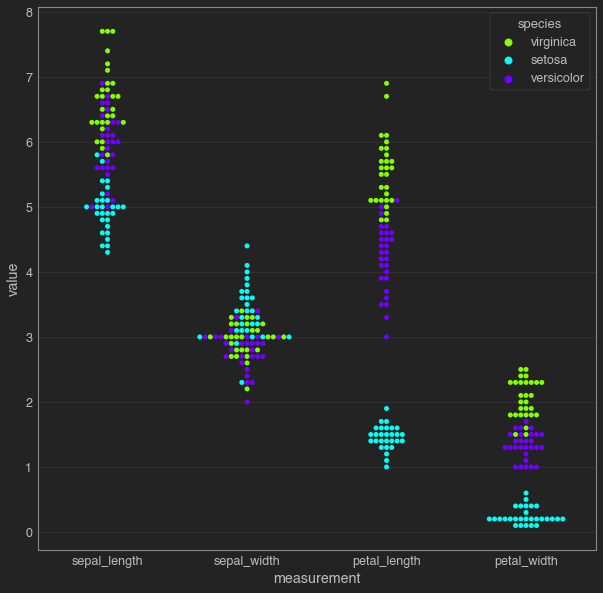

In [56]:
plt.figure(figsize=(10,10))
p = sns.swarmplot(
    x="measurement",
    y="value",
    hue="species",
    data=melt,
    palette='hsv'
)

plt.show()#petal measurements are good indicator of species

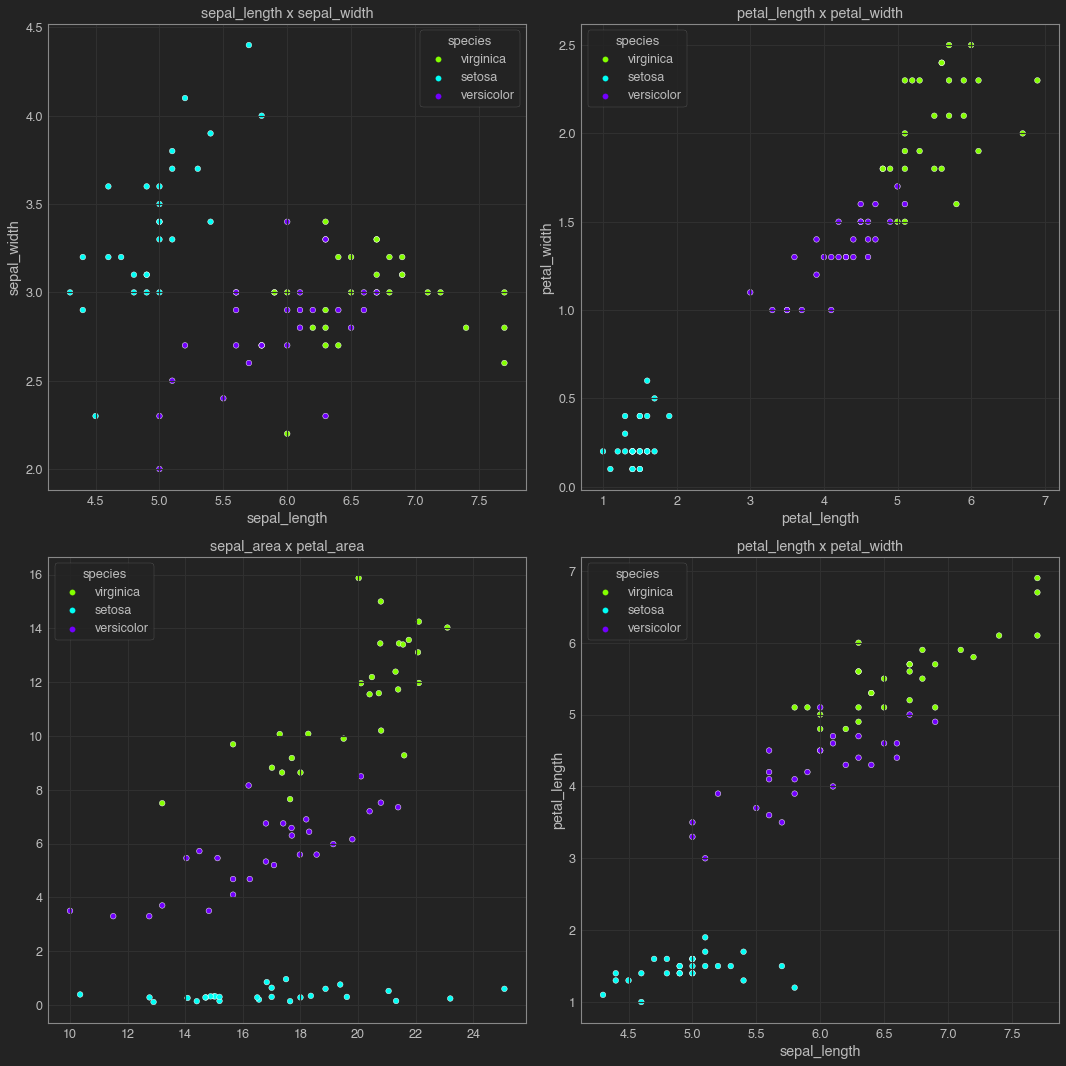

In [57]:
#3. Create 4 subplots (2 rows x 2 columns) of scatterplots.
plt.figure(figsize=(15,15))
# - sepal_length x sepal_width
plt.subplot(2,2,1)
sns.scatterplot(data=train,x='sepal_length', y= 'sepal_width', hue='species',palette='hsv')
plt.title('sepal_length x sepal_width')

# - petal_length x petal_width
plt.subplot(2,2,2)
sns.scatterplot(data=train,x='petal_length', y= 'petal_width', hue='species',palette='hsv')
plt.title('petal_length x petal_width')

# - sepal_area x petal_area
plt.subplot(2,2,3)
sns.scatterplot(data=train,x= train.sepal_length * train.sepal_width, y=train.petal_length * train.petal_width,hue='species',palette='hsv')
plt.title('sepal_area x petal_area')

# - sepal_length x petal_length
plt.subplot(2,2,4)
sns.scatterplot(data=train, x= 'sepal_length', y='petal_length',hue='species',palette='hsv')
plt.title('petal_length x petal_width')
# - What are your takeaways?
# petal length and petal width has a strong positive correlation
plt.tight_layout()

<AxesSubplot:>

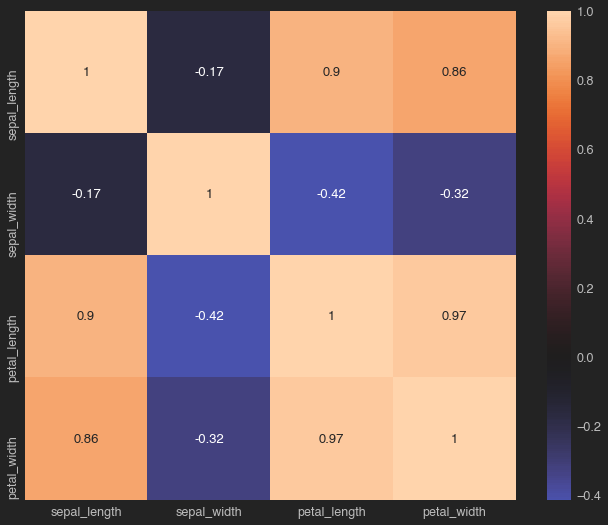

In [58]:
#4. Create a heatmap of each variable layering correlation coefficient on top.
sns.heatmap(train.iloc[:,0:5].corr(), annot = True, center=0) 

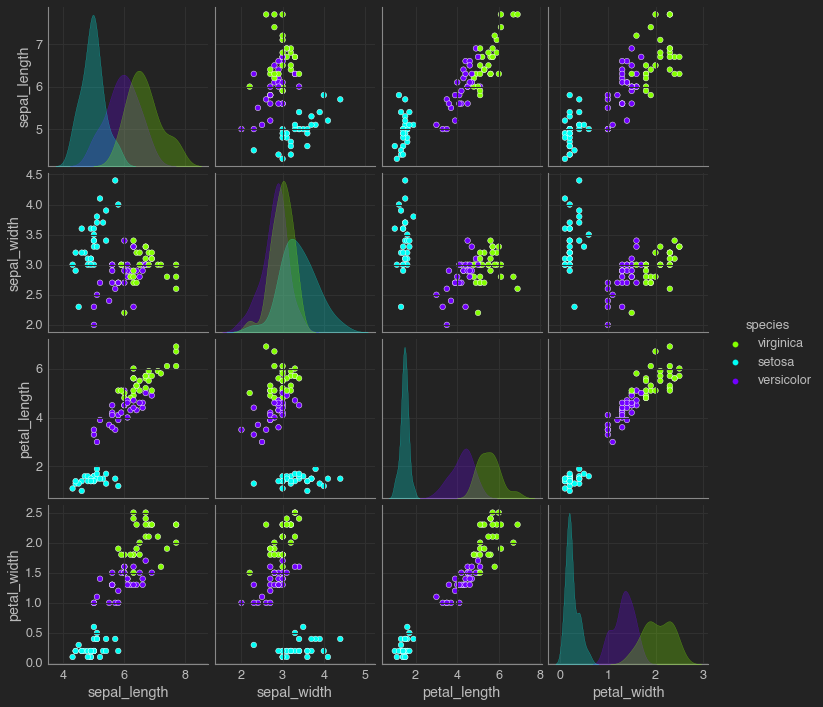

In [59]:
#5. Create a scatter matrix visualizing the interaction of each variable.
sns.pairplot(train.iloc[:,0:5], hue='species', palette='hsv')

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

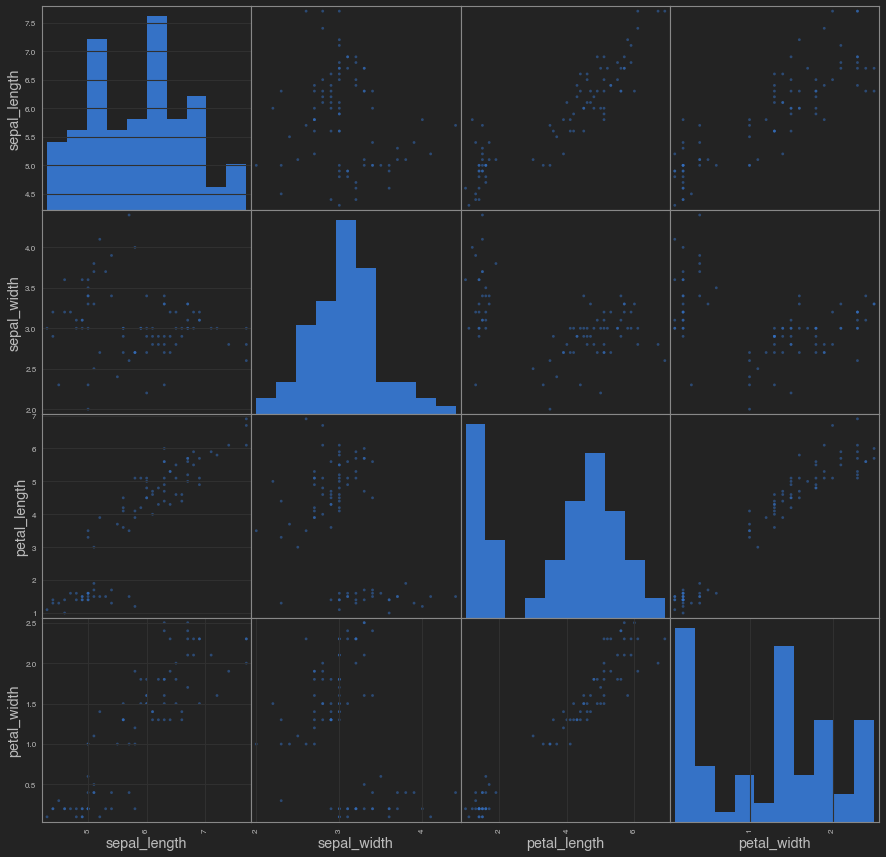

In [60]:
pd.plotting.scatter_matrix(train.iloc[:,0:5], figsize=(15,15)) # doesn't look as good as a pairplot..

In [61]:
#6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.
#. - Make sure to include a null hypothesis, alternative hypothesis, results, and summary.
from scipy import stats

null = 'sepal length is not significantly different between virginica and versicolor'
alt = 'sepal length is significantly different between virginica and versicolor'
confidence_level = 0.95
a = 1 - confidence_level 

virginica_seplength = train[train.species == 'virginica'].sepal_length
versicolor_seplength = train[train.species == 'versicolor'].sepal_length

t,p = stats.ttest_ind(virginica_seplength,versicolor_seplength)
t,p

(5.11297615624047, 4.290643505303538e-06)

In [62]:
if p < a:
    print("We reject the null hypothesis that they are the same")
    print("We move forward w/ the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that they are the same
We move forward w/ the alternative hypothesis


In [63]:
# - What is your takeaway from this statistical testing?
#sepal length between virginica and versicolor species is significantly different

In [64]:
#7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
sepal_length,1.000000,-0.166612,0.900357,0.860775,-0.752913,0.074486,0.678427
sepal_width,-0.166612,1.000000,-0.415310,-0.323396,0.566281,-0.432322,-0.133959
petal_length,0.900357,-0.415310,1.000000,0.965383,-0.919061,0.193310,0.725751
petal_width,0.860775,-0.323396,0.965383,1.000000,-0.882093,0.113537,0.768556
species_setosa,-0.752913,0.566281,-0.919061,-0.882093,1.000000,-0.500000,-0.500000
species_versicolor,0.074486,-0.432322,0.193310,0.113537,-0.500000,1.000000,-0.500000
species_virginica,0.678427,-0.133959,0.725751,0.768556,-0.500000,-0.500000,1.000000


<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

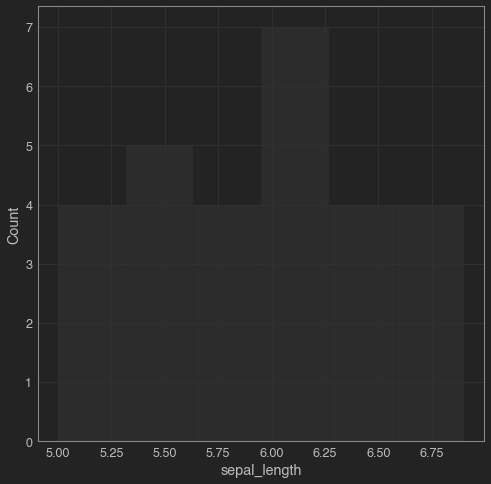

In [65]:
plt.figure(figsize=(8,8))
sns.histplot(data=versicolor_seplength)

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

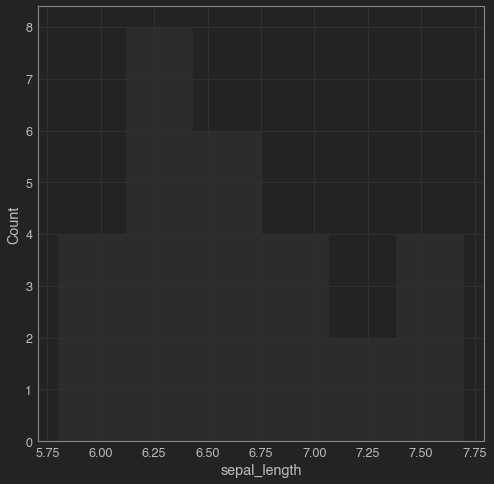

In [66]:
plt.figure(figsize=(8,8))
sns.histplot(data=virginica_seplength)